In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
import keras
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
dirA="./Datasets/setA/"
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)

dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigA=table(ta)
bigB=table(tb)
bigC=table(tc)
bigD=table(td)
bigE=table(te)

head=list(bigA.columns.values)

In [6]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [7]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) 

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

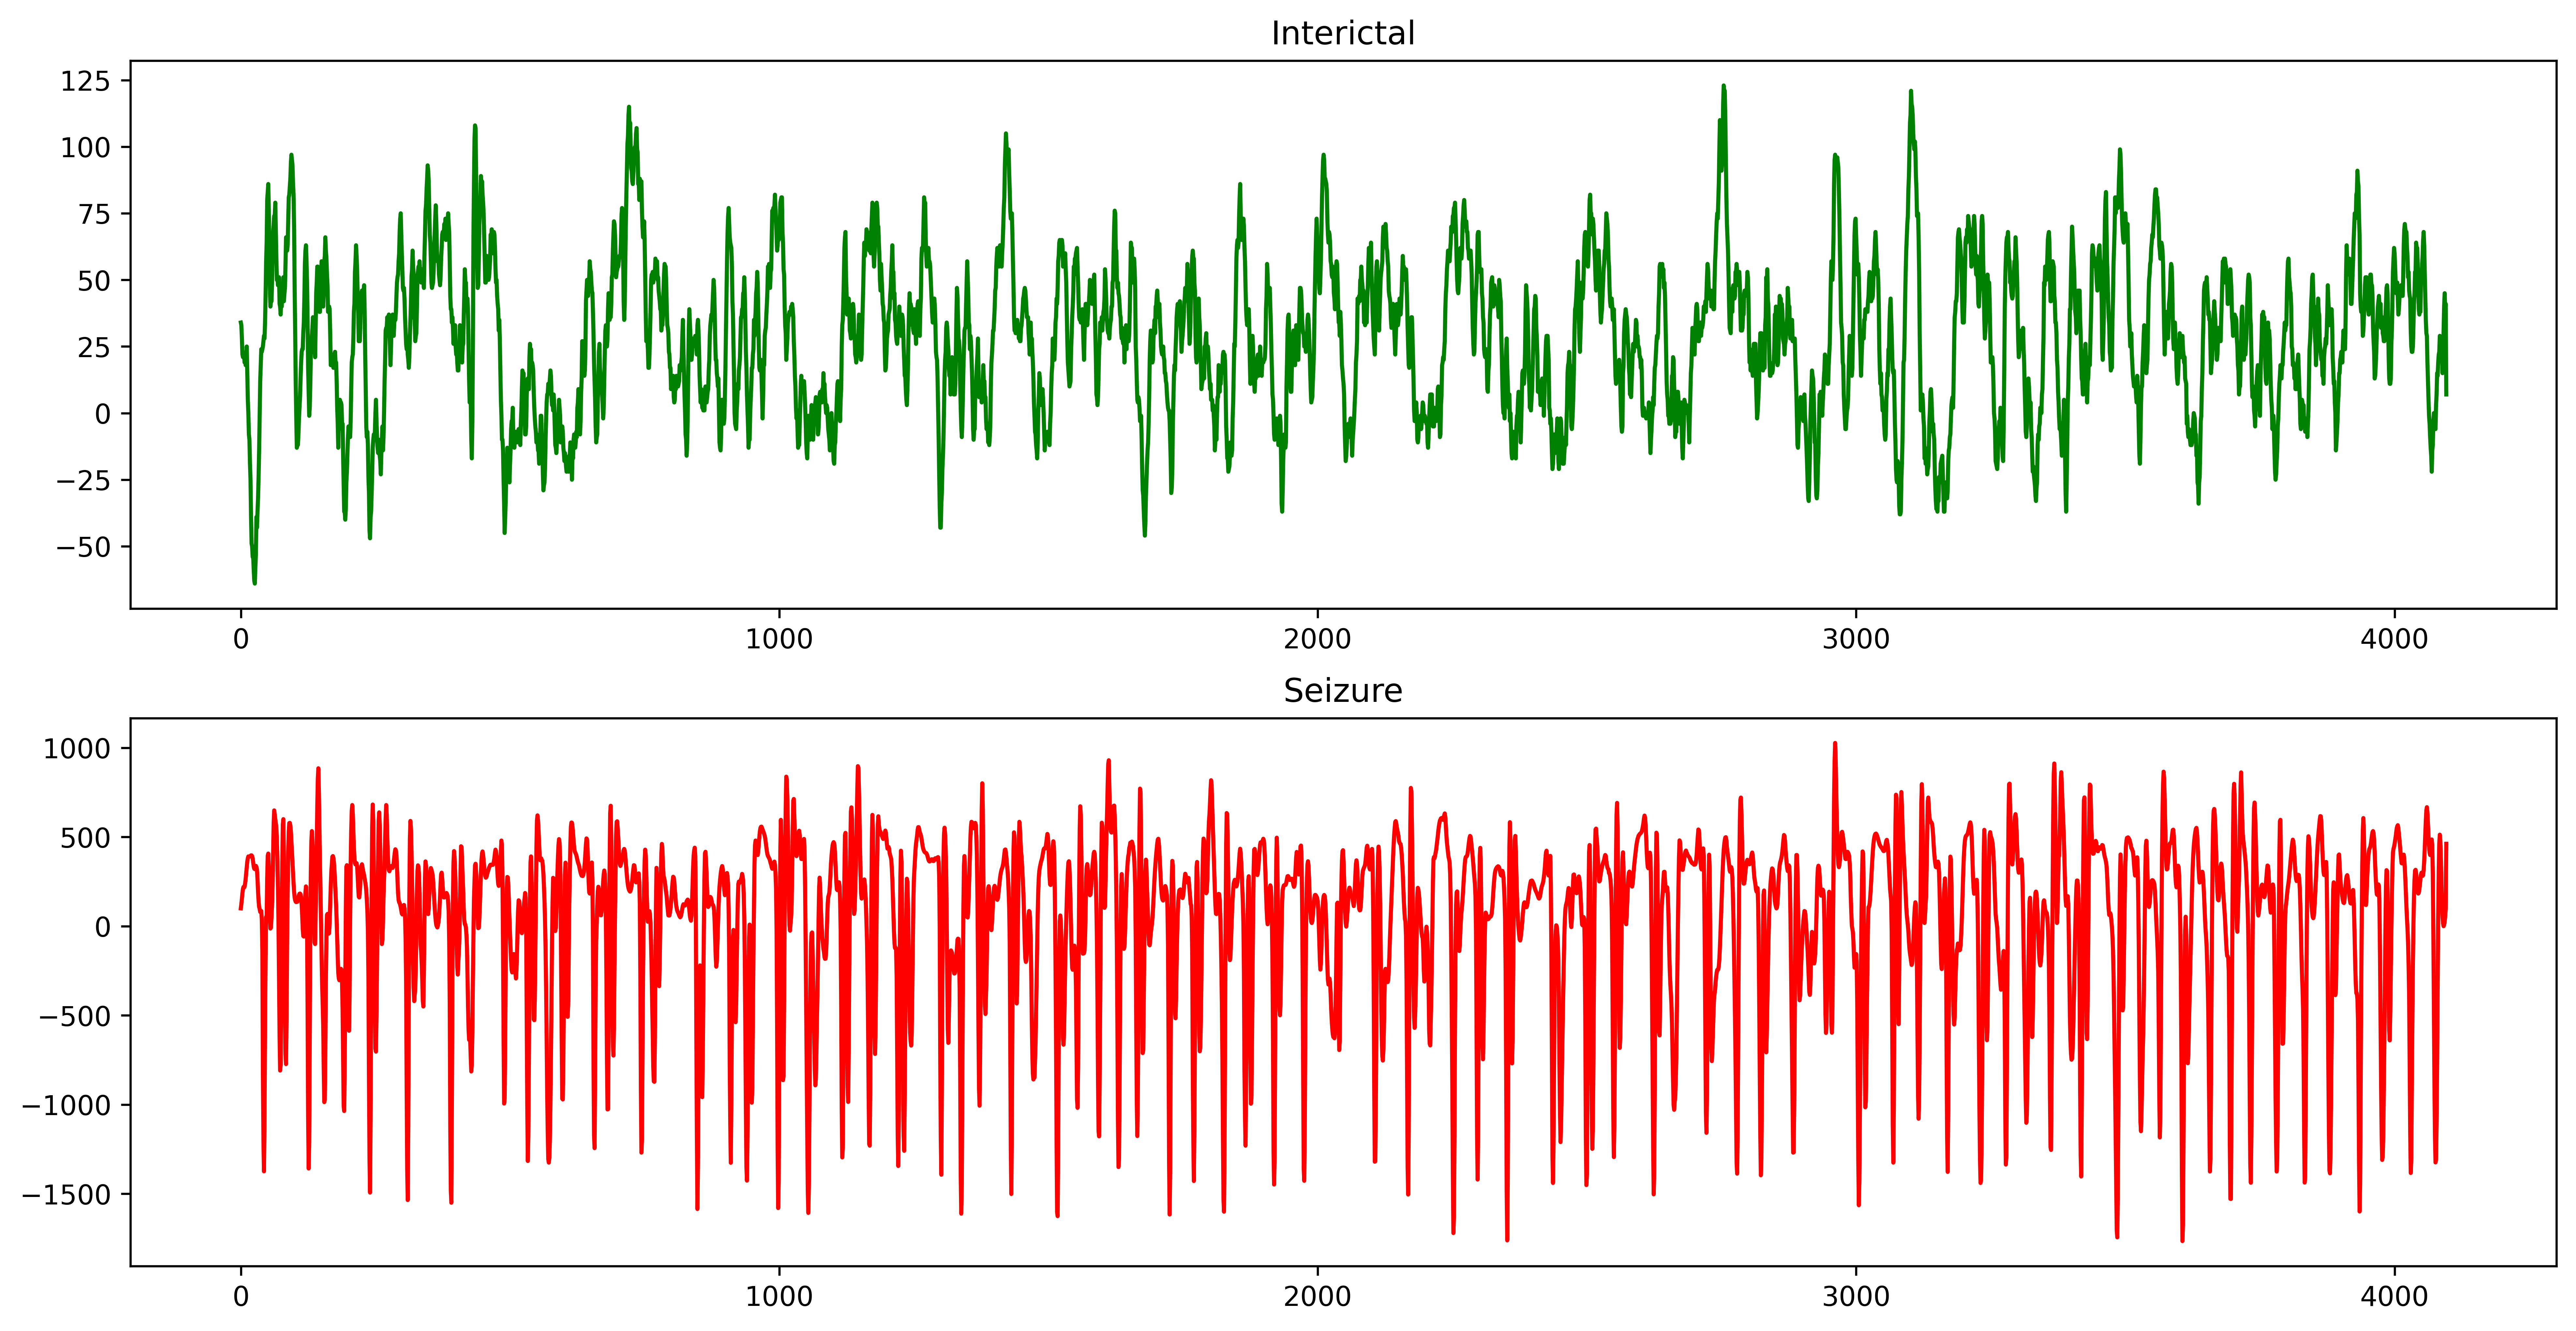

In [8]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8),dpi=600)
plt.subplot(2,1,1)
plt.title('Interictal')
plt.plot(samples,matD[:,0],label='Interictal',color='green')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure',color='red')
plt.show()

In [9]:
matNS_out = np.zeros((1,100))
X_data_NS = np.concatenate((matD,matNS_out), axis = 0) 
print(X_data_NS.shape)

(4098, 100)


In [10]:
matS_out = np.ones((1,100))
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape)

(4098, 100)


In [11]:
data = np.concatenate((X_data_NS,X_data_S), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [12]:
TotalData

A0     A1     A2     A3     A4     A5     A6     A7     A8     A9   
S0     34.0   33.0   28.0   22.0   21.0   22.0   22.0   19.0   22.0   18.0  \
S1     60.0   47.0   38.0   29.0   28.0   30.0   28.0   30.0   36.0   51.0   
S2     26.0   16.0   13.0   12.0   17.0   16.0    7.0   -6.0  -19.0  -25.0   
S3    -41.0  -42.0  -48.0  -48.0  -48.0  -45.0  -44.0  -36.0  -42.0  -43.0   
S4     13.0    6.0   -1.0  -13.0  -29.0  -42.0  -53.0  -71.0  -86.0  -94.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
S195  -40.0  -58.0  -75.0  -88.0  -89.0  -81.0  -67.0  -52.0  -28.0   14.0   
S196  187.0   44.0 -147.0 -368.0 -550.0 -657.0 -665.0 -581.0 -442.0 -290.0   
S197 -438.0 -561.0 -622.0 -581.0 -460.0 -295.0 -164.0  -70.0    3.0   66.0   
S198 -476.0 -518.0 -521.0 -362.0  -68.0  175.0  289.0  184.0   15.0 -130.0   
S199   23.0  144.0  228.0  260.0  255.0  218.0  178.0  126.0   60.0    6.0   

      ...  A4088  A4089  A4090  A4091  A4092  A4093  A4094  A4095  A4096  out  
S0    ...   24.0   15.0   22.0   31.0   40.0   45.0   39.0   41.0    7.0  0.0  
S1    ...  450.0  366.0  296.0  248.0  209.0  177.0  149.0  126.0   42.0  0.0  
S2    ...   70.0   77.0   86.0   99.0  113.0  119.0  114.0   99.0 -130.0  0.0  
S3    ...   -4.0  -11.0  -13.0  -15.0  -23.0  -28.0  -30.0  -23.0  -13.0  0.0  
S4    ...  -37.0   36.0   86.0  139.0  167.0  175.0  161.0  129.0    1.0  0.0  
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...  
S195  ...   32.0   32.0   18.0    6.0   -3.0  -10.0  -13.0  -16.0 -151.0  1.0  
S196  ...  510.0  562.0  607.0  667.0  748.0  763.0  703.0  446.0 -537.0  1.0  
S197  ...  443.0  399.0  319.0  196.0   40.0  -47.0 -118.0 -163.0  -56.0  1.0  
S198  ... -261.0 -248.0 -147.0   36.0  224.0  299.0  246.0  556.0  276.0  1.0  
S199  ... -127.0 -123.0 -152.0 -231.0 -272.0 -272.0 -155.0    6.0 -221.0  1.0  

[200 rows x 4098 columns]

In [13]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

In [14]:
final_values = []

In [15]:
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))
level =5
w_name = 'bior6.8'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [16]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD5 = []
temp_cD4 = []
temp_cD3 = []
temp_cD2 = []
temp_cD1 = []
for i in matD.T:
  cA,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
  temp_cD3.append(cD3)
  temp_cD4.append(cD4)
  temp_cD5.append(cD5)  
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)
coeff_cD3 = np.array(temp_cD3)
coeff_cD4 = np.array(temp_cD4)
coeff_cD5 = np.array(temp_cD5)

In [17]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD5_S = []
temp_cD4_S = []
temp_cD3_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD5_S,cD4_S,cD3_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD3_S.append(cD3_S)
  temp_cD4_S.append(cD4_S)
  temp_cD5_S.append(cD5_S)
  temp_cD2_S.append(cD2_S)
  temp_cD1_S.append(cD1_S)
coeff_cA_S = np.array(temp_cA_S)
coeff_cD5_S = np.array(temp_cD5_S)
coeff_cD4_S = np.array(temp_cD4_S)
coeff_cD3_S = np.array(temp_cD3_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [18]:
#Seizure
print(coeff_cA_S.shape)
print(coeff_cD5_S.shape)
print(coeff_cD4_S.shape)
print(coeff_cD3_S.shape)
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)

#Normal
print(coeff_cA.shape)
print(coeff_cD5.shape)
print(coeff_cD4.shape)
print(coeff_cD3.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)


In [19]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_S])
coeff_cD3_total = np.concatenate([coeff_cD3, coeff_cD3_S])
coeff_cD4_total = np.concatenate([coeff_cD4, coeff_cD4_S])
coeff_cD5_total = np.concatenate([coeff_cD5, coeff_cD5_S])

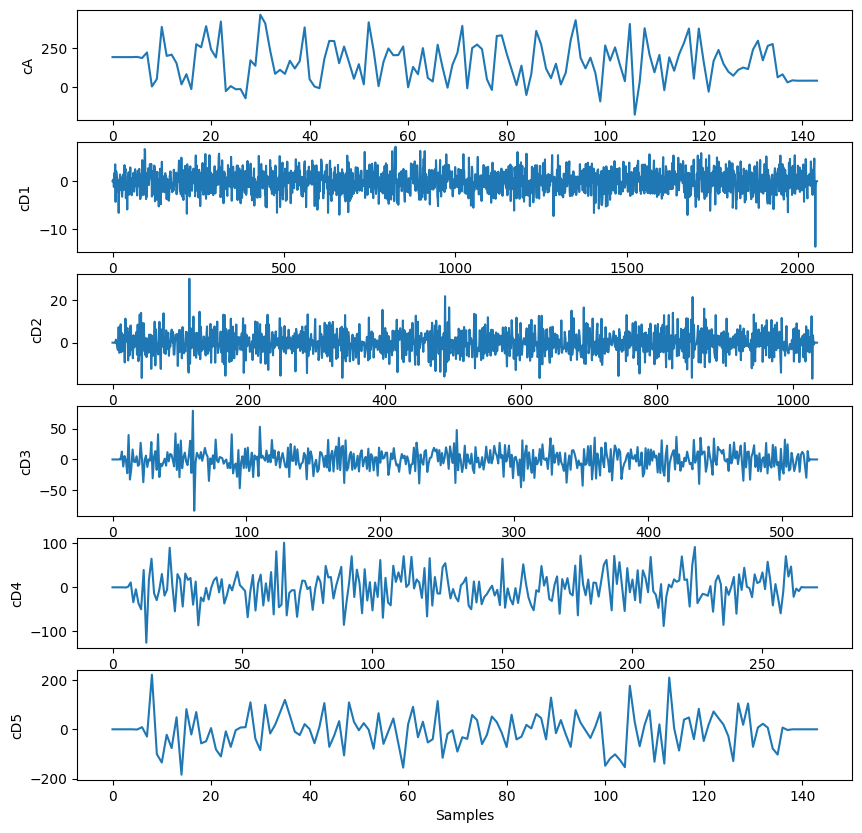

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA_total[0]),1),coeff_cA_total[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1_total[0]),1),coeff_cD1_total[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('cD2')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD2_total[0]),1),coeff_cD2_total[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('cD3')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD3_total[0]),1),coeff_cD3_total[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('cD4')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD4_total[0]),1),coeff_cD4_total[0,:].T)

plt.subplot(level+1,1,6)
plt.ylabel('cD5')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD5_total[0]),1),coeff_cD5_total[0,:].T)

plt.show()

In [21]:
feature_size = 4
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [22]:
def build_features(mat):
    lis = list()
    lis = lis + [skew(mat)]
    lis = lis + [kurtosis(mat)]
    lis = lis + [np.mean(mat)]
    lis = lis + [np.std(mat)]
    sleep(0.01)
             
    return lis

In [23]:
# create features of class I and cA
f1_cA_N    = np.zeros((100,1))
f2_cA_N    = np.zeros((100,1))
f3_cA_N    = np.zeros((100,1))
f4_cA_N    = np.zeros((100,1))

for i in range(100):
    [f1_cA_N[i,0],f2_cA_N[i,0],f3_cA_N[i,0],f4_cA_N[i,0]]=build_features(coeff_cA.T[:,i])

# # create features of class I and cD1
# f1_cD1_N    = np.zeros((100,1))
# f2_cD1_N    = np.zeros((100,1))
# f3_cD1_N    = np.zeros((100,1))
# f4_cD1_N    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_N[i,0],f2_cD1_N[i,0],f3_cD1_N[i,0],f4_cD1_N[i,0]]=build_features(coeff_cD1.T[:,i])
  
# create features of class I and cD1
f1_cD2_N   = np.zeros((100,1))
f2_cD2_N   = np.zeros((100,1))
f3_cD2_N   = np.zeros((100,1))
f4_cD2_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_N[i,0],f2_cD2_N[i,0],f3_cD2_N[i,0],f4_cD2_N[i,0]]=build_features(coeff_cD2.T[:,i])

# create features of class I and cD3
f1_cD3_N   = np.zeros((100,1))
f2_cD3_N   = np.zeros((100,1))
f3_cD3_N   = np.zeros((100,1))
f4_cD3_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_N[i,0],f2_cD3_N[i,0],f3_cD3_N[i,0],f4_cD3_N[i,0]]=build_features(coeff_cD3.T[:,i])

# create features of class I and cD4
f1_cD4_N   = np.zeros((100,1))
f2_cD4_N   = np.zeros((100,1))
f3_cD4_N   = np.zeros((100,1))
f4_cD4_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_N[i,0],f2_cD4_N[i,0],f3_cD4_N[i,0],f4_cD4_N[i,0]]=build_features(coeff_cD4.T[:,i])
    
# create features of class I and cD5
f1_cD5_N   = np.zeros((100,1))
f2_cD5_N   = np.zeros((100,1))
f3_cD5_N   = np.zeros((100,1))
f4_cD5_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_N[i,0],f2_cD5_N[i,0],f3_cD5_N[i,0],f4_cD5_N[i,0]]=build_features(coeff_cD5.T[:,i])

In [24]:
# create features of class II (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))
f4_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0],f4_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# # create features of class II (SEIZURE and cD1)
# f1_cD1_S    = np.zeros((100,1))
# f2_cD1_S    = np.zeros((100,1))
# f3_cD1_S    = np.zeros((100,1))
# f4_cD1_S    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0],f4_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])

# create features of class II (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))
f4_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0],f4_cD2_S[i,0]]=build_features(coeff_cD2_S.T[:,i])
    
# create features of class II (SEIZURE and cD3)
f1_cD3_S    = np.zeros((100,1))
f2_cD3_S    = np.zeros((100,1))
f3_cD3_S    = np.zeros((100,1))
f4_cD3_S    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_S[i,0],f2_cD3_S[i,0],f3_cD3_S[i,0],f4_cD3_S[i,0]]=build_features(coeff_cD3_S.T[:,i])
    

# create features of class II (SEIZURE and cD4)
f1_cD4_S    = np.zeros((100,1))
f2_cD4_S    = np.zeros((100,1))
f3_cD4_S    = np.zeros((100,1))
f4_cD4_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_S[i,0],f2_cD4_S[i,0],f3_cD4_S[i,0],f4_cD4_S[i,0]]=build_features(coeff_cD4_S.T[:,i])

# create features of class II (SEIZURE and cD5)
f1_cD5_S    = np.zeros((100,1))
f2_cD5_S    = np.zeros((100,1))
f3_cD5_S    = np.zeros((100,1))
f4_cD5_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_S[i,0],f2_cD5_S[i,0],f3_cD5_S[i,0],f4_cD5_S[i,0]]=build_features(coeff_cD5_S.T[:,i])

In [25]:
cl_N  = np.zeros((100,1))
cl_S  = np.ones((100,1))

In [26]:
MftN = np.concatenate([f1_cA_N, f2_cA_N, f3_cA_N, f4_cA_N,f1_cD2_N,f2_cD2_N,f3_cD2_N,f4_cD2_N,f1_cD3_N,f2_cD3_N,f3_cD3_N,f4_cD3_N,f1_cD4_N,f2_cD4_N,f3_cD4_N,f4_cD4_N,f1_cD5_N,f2_cD5_N,f3_cD5_N,f4_cD5_N,cl_N], axis=1)

MftS = np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f4_cA_S,f1_cD2_S,f2_cD2_S,f3_cD2_S,f4_cD2_S,f1_cD3_S,f2_cD3_S,f3_cD3_S,f4_cD3_S,f1_cD4_S,f2_cD4_S,f3_cD4_S,f4_cD4_S,f1_cD5_S,f2_cD5_S,f3_cD5_S,f4_cD5_S,cl_S], axis=1)

In [27]:
FCM_N  = pd.DataFrame(MftN ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])
FCM_S  = pd.DataFrame(MftS ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

In [28]:
TotalDataset = pd.concat([FCM_N,FCM_S],ignore_index=True)
print(TotalDataset.shape)

(200, 21)


In [29]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 20)
(40, 20)
(160, 1)
(40, 1)


In [32]:
x_train=X_train.reshape(X_train.shape[0],20,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=X_test.reshape(X_test.shape[0],20,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 20, 1)
(40, 20, 1)
(160, 1)
(40, 1)


In [34]:
batch_size=20
nb_epoch=200
hidden_size=64
use_dropout=True

model=Sequential()
model.add(Bidirectional(LSTM(hidden_size,input_shape=(20,1))))

if use_dropout:
    model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])


history=model.fit(x_train,y_train,validation_split=0,batch_size=batch_size,epochs=nb_epoch)
score=model.evaluate(x_test,y_test,batch_size=batch_size)
y_pred=model.predict(x_test).round()

Epoch 1/200
8/8 [==============================] - 4s 8ms/step - loss: 0.7213 - acc: 0.5250
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6042 - acc: 0.6812
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 0.5374 - acc: 0.7750
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4606 - acc: 0.8188
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3441 - acc: 0.9250
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2894 - acc: 0.9312
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2056 - acc: 0.9563
Epoch 8/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2014 - acc: 0.9375
Epoch 9/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1765 - acc: 0.9312
Epoch 10/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1257 - acc: 0.9688
Epoch 11/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1349 

8/8 [==============================] - 0s 5ms/step - loss: 9.5555e-04 - acc: 1.0000
Epoch 90/200
8/8 [==============================] - 0s 5ms/step - loss: 8.0768e-04 - acc: 1.0000
Epoch 91/200
8/8 [==============================] - 0s 5ms/step - loss: 8.9146e-04 - acc: 1.0000
Epoch 92/200
8/8 [==============================] - 0s 5ms/step - loss: 7.5518e-04 - acc: 1.0000
Epoch 93/200
8/8 [==============================] - 0s 5ms/step - loss: 9.5292e-04 - acc: 1.0000
Epoch 94/200
8/8 [==============================] - 0s 5ms/step - loss: 9.9721e-04 - acc: 1.0000
Epoch 95/200
8/8 [==============================] - 0s 5ms/step - loss: 9.7686e-04 - acc: 1.0000
Epoch 96/200
8/8 [==============================] - 0s 5ms/step - loss: 8.1924e-04 - acc: 1.0000
Epoch 97/200
8/8 [==============================] - 0s 5ms/step - loss: 9.0144e-04 - acc: 1.0000
Epoch 98/200
8/8 [==============================] - 0s 5ms/step - loss: 0.0011 - acc: 1.0000
Epoch 99/200
8/8 [=============================

8/8 [==============================] - 0s 5ms/step - loss: 2.1583e-04 - acc: 1.0000
Epoch 173/200
8/8 [==============================] - 0s 5ms/step - loss: 1.3645e-04 - acc: 1.0000
Epoch 174/200
8/8 [==============================] - 0s 4ms/step - loss: 1.9132e-04 - acc: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 6ms/step - loss: 2.6902e-04 - acc: 1.0000
Epoch 176/200
8/8 [==============================] - 0s 6ms/step - loss: 2.8695e-04 - acc: 1.0000
Epoch 177/200
8/8 [==============================] - 0s 5ms/step - loss: 2.3524e-04 - acc: 1.0000
Epoch 178/200
8/8 [==============================] - 0s 6ms/step - loss: 1.6061e-04 - acc: 1.0000
Epoch 179/200
8/8 [==============================] - 0s 6ms/step - loss: 2.6735e-04 - acc: 1.0000
Epoch 180/200
8/8 [==============================] - 0s 5ms/step - loss: 2.3087e-04 - acc: 1.0000
Epoch 181/200
8/8 [==============================] - 0s 5ms/step - loss: 1.9040e-04 - acc: 1.0000
Epoch 182/200
8/8 [===============

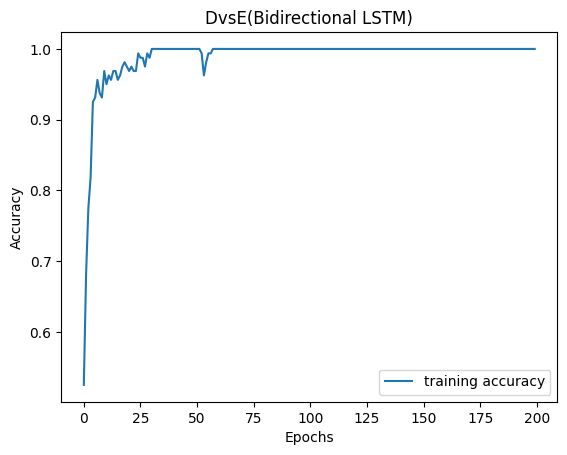

In [35]:
plt.plot(history.history['acc'], label='training accuracy')
plt.title('DvsE(Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('14-DvsE(Bidirectional LSTM)_Accuracy.png')
plt.show()

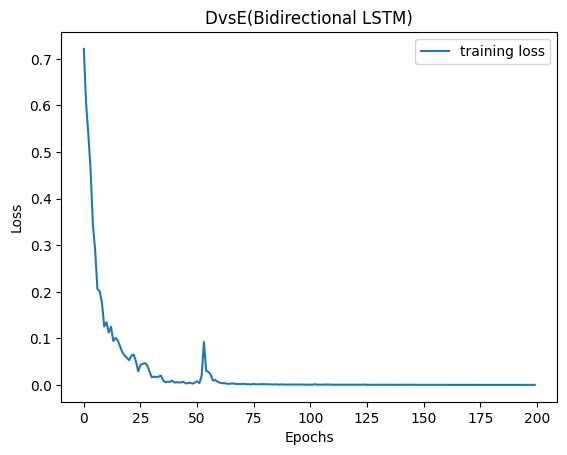

In [36]:
plt.plot(history.history['loss'], label='training loss')
plt.title('DvsE(Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('14-DvsE(Bidirectional LSTM)_Loss.png')
plt.show()

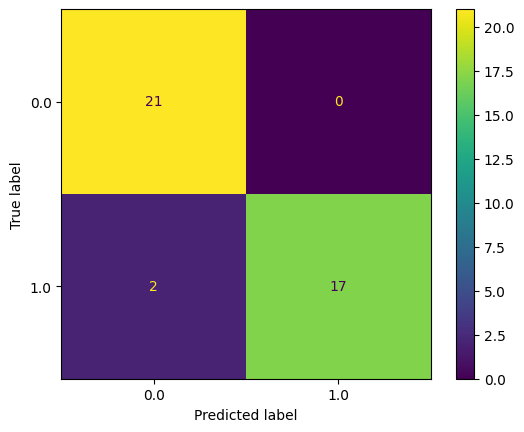

In [37]:
actual=y_test
predicted=y_pred
onfusion_matrix = metrics.confusion_matrix(actual, predicted)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('14-DvsE(Bidirectional LSTM)_confusionMatrix.png')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        21
         1.0       1.00      0.89      0.94        19

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

